# Python for Data Science
## Transforming DataFrames
When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.
- `.head()` returns the first few rows (the “head” of the DataFrame).
- `.info()` shows information on each of the columns, such as the data type and number of missing values.
- `.shape` returns the number of rows and columns of the DataFrame.
- `.describe()` calculates a few summary statistics for each column.

In [8]:
# Import pandas as pd
import pandas as pd

# Import the homelessness DataFrame containing estimates of homelessness in each U.S. state in 2018. 
homelessness = pd.read_csv("https://raw.githubusercontent.com/xLiQuiDz/Erasmus/main/Data%20Science%20-%20Lecture%201/data/homelessness.csv?token=GHSAT0AAAAAABZDAKOXUMGS2ZPL3JKLJ6V4Y2DQX4Q", index_col = 0)

# Print the head of the homelessness data
homelessness.head()

# Print information about homelessness
homelessness.info()

# Print the shape of homelessness
homelessness.shape

# Print a description of homelessness
homelessness.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:
- `.values`: A two-dimensional NumPy array of values.
- `.columns`: An index of columns: the column names.
- `.index`: An index for the rows: either row numbers or row names.

In [9]:
# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[['East South Central' 'Alabama' 2570.0 864.0 4887681]
 ['Pacific' 'Alaska' 1434.0 582.0 735139]
 ['Mountain' 'Arizona' 7259.0 2606.0 7158024]
 ['West South Central' 'Arkansas' 2280.0 432.0 3009733]
 ['Pacific' 'California' 109008.0 20964.0 39461588]
 ['Mountain' 'Colorado' 7607.0 3250.0 5691287]
 ['New England' 'Connecticut' 2280.0 1696.0 3571520]
 ['South Atlantic' 'Delaware' 708.0 374.0 965479]
 ['South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 ['South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 ['South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 ['Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 ['Mountain' 'Idaho' 1297.0 715.0 1750536]
 ['East North Central' 'Illinois' 6752.0 3891.0 12723071]
 ['East North Central' 'Indiana' 3776.0 1482.0 6695497]
 ['West North Central' 'Iowa' 1711.0 1038.0 3148618]
 ['West North Central' 'Kansas' 1443.0 773.0 2911359]
 ['East South Central' 'Kentucky' 2735.0 953.0 4461153]
 ['West South Central' 'Louisiana' 2540.0 519.0 4659690]
 ['New 

### Sorting & Subsetting
Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to `.sort_values()`.

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

**Sort On ...** | **Syntax** 
--- | --- 
one column | `df.sort_values("breed")`
multiple column | `df.sort_values(["breed", "weight_kg"])`

In [10]:
# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values("individuals", ascending = False)

# Print the top few rows
homelessness_ind.head()

# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending = True)

# Print the top few rows
homelessness_fam.head()

# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], ascending = [True, False])

# Print the top few rows
homelessness_reg_fam.head()

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497


When working with data, you may not need all of the variables in your dataset. Square brackets (`[]`) can be used to select only the columns that matter to you in an order that makes sense to you. To select only `"col_a"` of the DataFrame `df`, use:

```python
df["col_a"]
```

To select `"col_a"` and `"col_b"` of `df`, use:


```python
df[["col_a", "col_b"]]
```

In [11]:
# Select the individuals column
individuals = homelessness["individuals"]

# Print the head of the result
individuals.head()

# Select the state and family_members columns
state_fam = homelessness[["state", "family_members"]]

# Print the head of the result
state_fam.head()

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0


A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.

There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return `True` or `False` for each row, then pass that inside square brackets.

```python
dogs[dogs["height_cm"] > 60]
dogs[dogs["color"] == "tan"]
```

You can filter for multiple conditions at once by using the "bitwise and" operator, `&`.

```python
dogs[(dogs["height_cm"] > 60) & (dogs["color"] == "tan")]
```


In [12]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"] > 10000]

# See the result
ind_gt_10k

# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness["region"] == "Mountain"]

# See the result
mountain_reg

# Filter for rows where family_members is less than 1000 and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")]

# See the result
fam_lt_1k_pac

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


Subsetting data based on a categorical variable often involves using the "or" operator (`|`) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the `.isin()` method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

```python
colors = ["brown", "black", "tan"]
condition = dogs["color"].isin(colors)
dogs[condition]
```

In [13]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness["region"] == "South Atlantic") | (homelessness["region"] == "Mid-Atlantic")]

# See the result
south_mid_atlantic

# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

# See the result
mojave_homelessness

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
4,Pacific,California,109008.0,20964.0,39461588
28,Mountain,Nevada,7058.0,486.0,3027341
44,Mountain,Utah,1904.0,972.0,3153550


### New Colomns
You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.

In [14]:
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_individuals col as proportion of total that are individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]

# See the result
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


## Aggregating DataFrames
### Summary Statistics
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [16]:
# Import pandas as pd
import pandas as pd

# Import sales data
sales = pd.read_csv("https://raw.githubusercontent.com/xLiQuiDz/Erasmus/main/Data%20Science%20-%20Lecture%201/data/sales_subset.csv?token=GHSAT0AAAAAABZDAKOWC5A7WYCB76WYHZDGY2DQ2GQ", index_col = 0)

# Print the head of the sales DataFrame
sales.head()

# Print the info about the sales DataFrame
sales.info()

# Print the mean of weekly_sales
sales["weekly_sales"].mean()

# Print the median of weekly_sales
sales["weekly_sales"].median()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 768.1+ KB


12049.064999999999

While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.

The `.agg()` method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example,

```python 
df['column'].agg(function)
```

In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.

In [17]:
# Import NumPy and create custom IQR function
import numpy as np

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median])

,temperature_c,fuel_price_usd_per_l,unemployment
iqr,16.583333,0.073176,0.565
median,16.966667,0.743381,8.099


### Duplicates & Counting
Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from `sales`.

In [18]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(["store", "type"])
store_types.head()

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(["store", "department"])
store_depts.head()

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(["date"])

# Print date col of holiday_dates
holiday_dates["date"]

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object

Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:

```python
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset = ["store", "type"])

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset = ["store", "department"])
```

In [19]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
store_counts

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize = True)
store_props

# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort = True)
dept_counts_sorted

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort = True, normalize = True)
dept_props_sorted

1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64

### Grouping
While .`groupby()` is useful, you can calculate grouped summary statistics without it.

In [20]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()

sales_by_type_is_holiday

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64

## Creating and Visualizing DataFrames
### Visualizing your data
Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


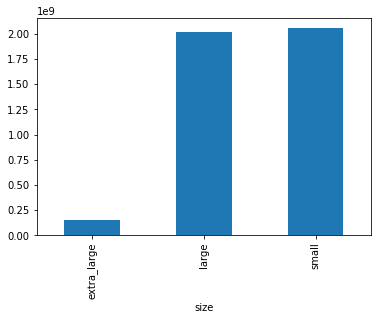

In [21]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Import pandas as pd
import pandas as pd

# Import sales data
avocados = pd.read_pickle("https://assets.datacamp.com/production/repositories/5386/datasets/5528f46cc712c9083a6881f787fc9b34ab53d5ea/avoplotto.pkl")

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind = "bar")

# Show the plot
plt.show()

Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

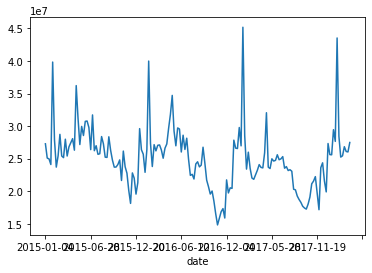

In [22]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot()

# Show the plot
plt.show()

Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

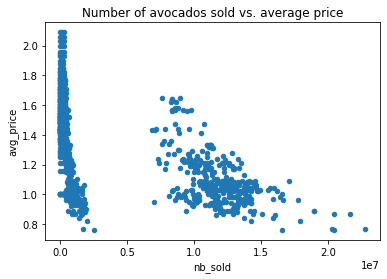

In [23]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x = "nb_sold", y = "avg_price", kind = "scatter", title = "Number of avocados sold vs. average price")

# Show the plot
plt.show()

Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

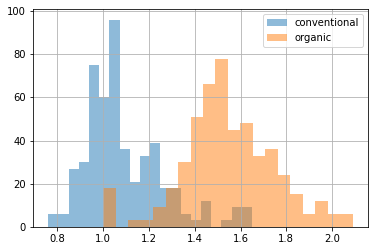

In [24]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins = 20)

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins = 20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

### Missing Values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

In [25]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados.isna())

# Check each column for missing values
print(avocados.isna().any())

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

In [26]:
# Remove rows with missing values
avocados_complete = avocados.dropna()

# Check if any columns contain missing values
print(avocados.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool
